In [60]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
images_path = '/content/drive/MyDrive/FaceCap/img2k/'
images = glob(images_path + '*.jpg')
len(images)

2000

# **image Preprocess**

In [63]:
print(images[0])

/content/drive/MyDrive/FaceCap/img2k/001006.jpg


In [64]:
images[:5]

['/content/drive/MyDrive/FaceCap/img2k/001006.jpg',
 '/content/drive/MyDrive/FaceCap/img2k/000996.jpg',
 '/content/drive/MyDrive/FaceCap/img2k/000974.jpg',
 '/content/drive/MyDrive/FaceCap/img2k/000972.jpg',
 '/content/drive/MyDrive/FaceCap/img2k/000992.jpg']

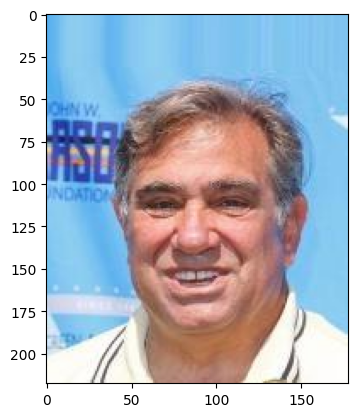

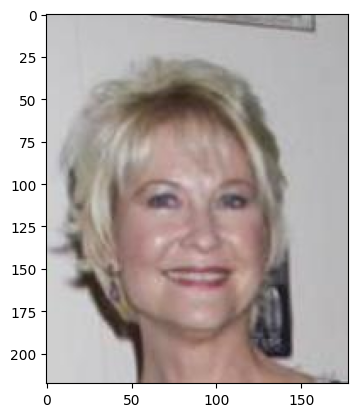

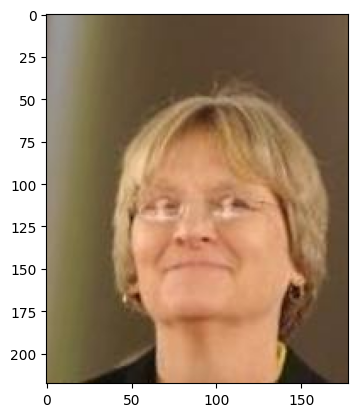

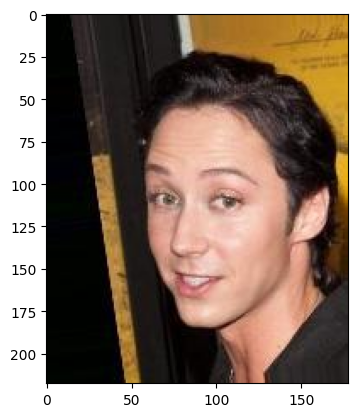

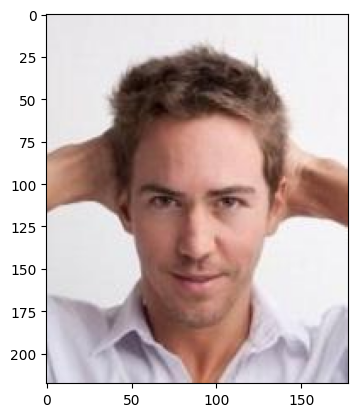

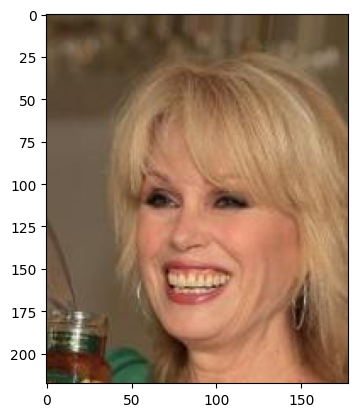

In [65]:
import matplotlib.pyplot as plt

for i in range(6):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [66]:
# Most Recent One (Suggested)
!pip install git+https://github.com/yaledhlab/vggface.git

  Cloning https://github.com/yaledhlab/vggface.git to /tmp/pip-req-build-2mq37wws
  Running command git clone --filter=blob:none --quiet https://github.com/yaledhlab/vggface.git /tmp/pip-req-build-2mq37wws
  Resolved https://github.com/yaledhlab/vggface.git to commit b76539b7588bca69b0030ad7e4f985f877dc7c0a
  Preparing metadata (setup.py) ... done


In [67]:
!pip install keras_applications

In [68]:
# import keras
# from keras_vggface.vggface import VGGFace

# # Convolution Features
# incept_model = VGGFace(include_top=True) # pooling: None, avg or max

# # After this point you can use your model to predict.
# # ...

In [69]:
import keras
from keras.applications import ResNet50, InceptionV3

incept_model = ResNet50(include_top=True)

In [70]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [71]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))

    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)

    img_name = i.split('/')[-1]

    images_features[img_name] = pred

    count += 1

    if count > 1499:
        break

    elif count % 50 == 0:
        print(count)




1/1 [==============================] - 0s 24ms/step
50
1/1 [==============================] - 0s 120ms/step
100
1/1 [==============================] - 0s 54ms/step
150
1/1 [==============================] - 0s 36ms/step
200
1/1 [==============================] - 0s 27ms/step
250
1/1 [==============================] - 0s 47ms/step
300
1/1 [==============================] - 0s 23ms/step
350
1/1 [==============================] - 0s 23ms/step
400
1/1 [==============================] - 0s 25ms/step
450
1/1 [==============================] - 0s 49ms/step
500
1/1 [==============================] - 0s 25ms/step
550
1/1 [==============================] - 0s 23ms/step
600
1/1 [==============================] - 0s 37ms/step
650
1/1 [==============================] - 0s 24ms/step
700
1/1 [==============================] - 0s 24ms/step
750
1/1 [==============================] - 0s 29ms/step
800
1/1 [==============================] - 0s 38ms/step
850
1/1 [==============================] - 0s 23ms/s

In [72]:
len(images_features)

1500

# **Text Preprocess**

In [73]:
# caption_path = '../input/flickr8k-sau/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'

In [74]:
captions = pd.read_csv('/content/drive/MyDrive/FaceCap/caption_celeba_2k.csv')

In [75]:
cap1 = captions.dropna()
cap2  = cap1[['image', 'Caption_Bangla', 'Caption_English']]
cap2['image'] = cap2.image.apply(lambda x: pd.Series(str(x).split("#")[0]))


<ipython-input-75-a9d8f0a51bdf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap2['image'] = cap2.image.apply(lambda x: pd.Series(str(x).split("#")[0]))


In [76]:
captions_dict = {}

for i in range(len(cap2)):
    try:
        img_name = cap2['image'][i]
        caption = cap2['Caption_English'][i]

        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]


            else:
                captions_dict[img_name].append(caption)


    except:
        pass

In [77]:
len(captions_dict)

1498

# **Visualize Images with captions**

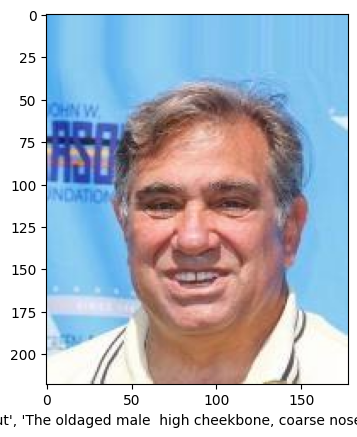

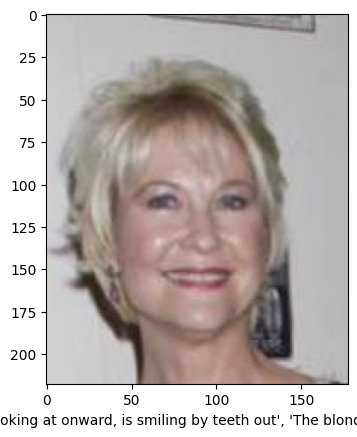

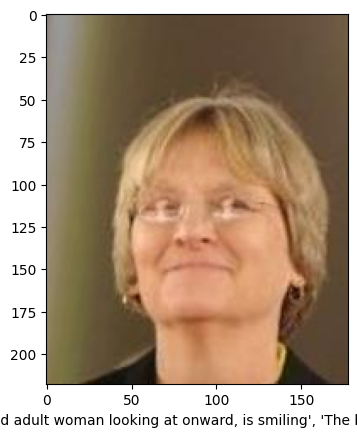

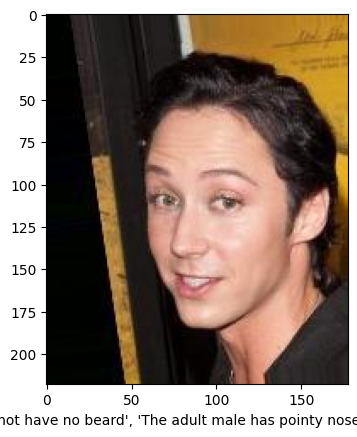

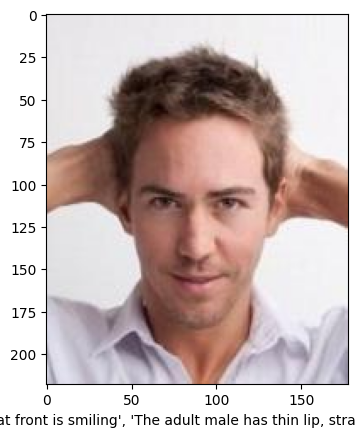

In [78]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]


    img = cv2.imread(img_name)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

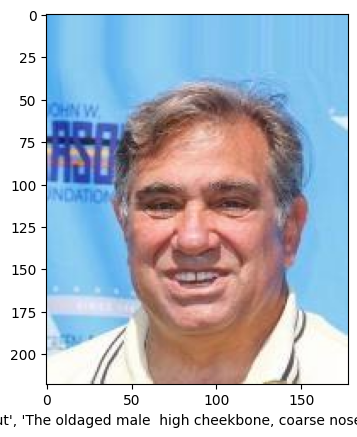

In [79]:
import matplotlib.pyplot as plt

for k in images_features.keys():
    plt.figure()

    img_name = '/content/drive/MyDrive/FaceCap/img2k/' + k


    img = cv2.imread(img_name)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

    break

In [80]:

def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified


In [81]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

# **Create Vocabulary**

In [82]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [83]:
len(count_words)

1296

In [84]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1


In [85]:
len(new_dict)

1296

In [86]:
new_dict['<OUT>'] = len(new_dict)

In [87]:
captions_backup = captions_dict.copy()

In [88]:
captions_dict = captions_backup.copy()

In [89]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [90]:
captions_dict

{'000001.jpg': [[1, 2, 3, 4, 5, 6, 7, 8],
  [1, 9, 4, 10, 11, 12, 13, 14, 15, 16, 8],
  [1, 2, 3, 17, 11, 18, 13, 6, 7, 8],
  [1, 2, 3, 4, 5, 11, 19, 20, 8],
  [1, 2, 3, 5, 6, 21, 11, 22, 23, 8]],
 '000002.jpg': [[1, 9, 4, 5, 11, 24, 13, 8],
  [1, 9, 4, 5, 6, 21, 11, 9, 25, 26, 8],
  [1, 9, 4, 5, 11, 27, 28, 29, 30, 31, 8],
  [1, 9, 4, 5, 32, 24, 13, 33, 34, 35, 36, 8],
  [1, 9, 4, 5, 11, 30, 37, 29, 19, 38, 8]],
 '000003.jpg': [[1, 9, 39, 40, 41, 9, 42, 43, 8],
  [1, 9, 44, 45, 40, 41, 9, 42, 43, 32, 46, 47, 48, 8],
  [1, 9, 42, 43, 11, 9, 49, 28, 29, 50, 13, 51, 8],
  [1, 9, 42, 43, 11, 52, 53, 54, 8],
  [1, 9, 39, 40, 55, 9, 42, 43, 56, 57, 8]],
 '000004.jpg': [[1, 9, 39, 40, 41, 9, 4, 5, 8],
  [1, 9, 39, 40, 41, 9, 4, 5, 58, 59, 29, 60, 8],
  [1, 9, 4, 5, 61, 62, 8],
  [1, 9, 4, 5, 58, 49, 63, 29, 64, 65, 8],
  [1, 9, 4, 5, 11, 18, 13, 29, 49, 66, 28, 8]],
 '000005.jpg': [[1, 9, 4, 5, 11, 67, 68, 8],
  [1, 9, 4, 5, 11, 69, 59, 70, 71, 72, 19, 8],
  [1, 9, 5, 73, 6, 9, 74, 75, 76, 9

------------------------------------------------------------------------------------------------------

# **Build Generator Function**

In [91]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [92]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 5, 6, 7, 8]
[1, 9, 4, 10, 11, 12, 13, 14, 15, 16, 8]
[1, 9, 4, 5, 32, 24, 13, 33, 34, 35, 36, 8]
[1, 9, 44, 45, 40, 41, 9, 42, 43, 32, 46, 47, 48, 8]
[1, 2, 3, 4, 5, 11, 79, 105, 66, 78, 30, 37, 29, 19, 38, 8]
[1, 9, 4, 17, 14, 71, 13, 114, 103, 9, 44, 115, 29, 116, 117, 118, 44, 103, 119, 8]
[1, 162, 3, 107, 356, 5, 14, 264, 78, 30, 242, 105, 30, 29, 357, 276, 127, 268, 241, 18, 8]
[1, 162, 3, 4, 5, 14, 19, 176, 269, 358, 293, 245, 349, 19, 366, 276, 127, 27, 29, 293, 28, 8]
[1, 9, 151, 278, 279, 14, 27, 29, 293, 78, 30, 242, 349, 249, 241, 297, 19, 138, 52, 358, 12, 37, 8]
[1, 162, 151, 278, 64, 279, 14, 79, 29, 293, 28, 29, 105, 98, 29, 372, 127, 19, 138, 52, 358, 64, 241, 268, 8]
[1, 162, 356, 279, 14, 121, 29, 18, 297, 12, 319, 29, 78, 30, 349, 303, 315, 162, 291, 41, 297, 9, 219, 269, 90, 8]
[1, 9, 5, 11, 64, 13, 73, 14, 350, 121, 97, 30, 127, 29, 66, 78, 29, 58, 183, 182, 29, 9, 24, 470, 29, 6, 21, 8]


In [93]:
MAX_LEN

28

In [94]:
captions_dict

{'000001.jpg': [[1, 2, 3, 4, 5, 6, 7, 8],
  [1, 9, 4, 10, 11, 12, 13, 14, 15, 16, 8],
  [1, 2, 3, 17, 11, 18, 13, 6, 7, 8],
  [1, 2, 3, 4, 5, 11, 19, 20, 8],
  [1, 2, 3, 5, 6, 21, 11, 22, 23, 8]],
 '000002.jpg': [[1, 9, 4, 5, 11, 24, 13, 8],
  [1, 9, 4, 5, 6, 21, 11, 9, 25, 26, 8],
  [1, 9, 4, 5, 11, 27, 28, 29, 30, 31, 8],
  [1, 9, 4, 5, 32, 24, 13, 33, 34, 35, 36, 8],
  [1, 9, 4, 5, 11, 30, 37, 29, 19, 38, 8]],
 '000003.jpg': [[1, 9, 39, 40, 41, 9, 42, 43, 8],
  [1, 9, 44, 45, 40, 41, 9, 42, 43, 32, 46, 47, 48, 8],
  [1, 9, 42, 43, 11, 9, 49, 28, 29, 50, 13, 51, 8],
  [1, 9, 42, 43, 11, 52, 53, 54, 8],
  [1, 9, 39, 40, 55, 9, 42, 43, 56, 57, 8]],
 '000004.jpg': [[1, 9, 39, 40, 41, 9, 4, 5, 8],
  [1, 9, 39, 40, 41, 9, 4, 5, 58, 59, 29, 60, 8],
  [1, 9, 4, 5, 61, 62, 8],
  [1, 9, 4, 5, 58, 49, 63, 29, 64, 65, 8],
  [1, 9, 4, 5, 11, 18, 13, 29, 49, 66, 28, 8]],
 '000005.jpg': [[1, 9, 4, 5, 11, 67, 68, 8],
  [1, 9, 4, 5, 11, 69, 59, 70, 71, 72, 19, 8],
  [1, 9, 5, 73, 6, 9, 74, 75, 76, 9

In [95]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0

    X = []
    y_in = []
    y_out = []

    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)

    return X, y_in, y_out



In [96]:
X, y_in, y_out = generator(images_features, captions_dict)

In [97]:
len(X), len(y_in), len(y_out)

(79288, 79288, 79288)

In [98]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')



In [99]:
X.shape, y_in.shape, y_out.shape

((79288, 2048), (79288, 28), (79288, 1297))

In [100]:
X[1510]

array([0.01561058, 0.9562879 , 0.22990622, ..., 0.06672582, 0.        ,
       0.26025355], dtype=float32)

In [101]:
y_in[2]

array([1., 2., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# **MODEL**

In [102]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from tensorflow.keras.models import Sequential, Model
#from keras.layers import concatenate

In [103]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               262272    
                                                                 
 repeat_vector_1 (RepeatVect  (None, 28, 128)          0         
 or)                                                             
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 28, 128)           166016    
                                                                 
 lstm_3 (LSTM)               (None, 28, 256)           394240    
                          

In [104]:
model.fit([X, y_in], y_out, batch_size=512, epochs=200)

Epoch 1/200
155/155 [==============================] - 19s 89ms/step - loss: 4.6156 - accuracy: 0.0884
Epoch 2/200
155/155 [==============================] - 10s 67ms/step - loss: 4.4784 - accuracy: 0.0916
Epoch 3/200
155/155 [==============================] - 10s 66ms/step - loss: 4.4518 - accuracy: 0.0923
Epoch 4/200
155/155 [==============================] - 10s 65ms/step - loss: 4.4204 - accuracy: 0.0925
Epoch 5/200
155/155 [==============================] - 10s 66ms/step - loss: 4.3869 - accuracy: 0.0918
Epoch 6/200
155/155 [==============================] - 10s 63ms/step - loss: 4.3498 - accuracy: 0.0920
Epoch 7/200
155/155 [==============================] - 10s 63ms/step - loss: 4.3197 - accuracy: 0.0910
Epoch 8/200
155/155 [==============================] - 10s 63ms/step - loss: 3.8479 - accuracy: 0.1760
Epoch 9/200
155/155 [==============================] - 10s 62ms/step - loss: 3.4120 - accuracy: 0.2573
Epoch 10/200
155/155 [==============================] - 10s 62ms/step - l

In [105]:
inv_dict = {v:k for k, v in new_dict.items()}

In [106]:
model.save('model.h5')

In [107]:
model.save_weights('mine_model_weights.h5')

In [108]:
np.save('vocab.npy', new_dict)

In [109]:
def getImage(x):

    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))

    return test_img

# **Predictions**

In [110]:

pred_captions = {}
pred_indx = {}

for no in range(1500,len(images)):

    #no = np.random.randint(1500,1600,(1,1))[0,0]
    img = getImage(no)
    test_feature = modele.predict(getImage(no)).reshape(1, 2048)
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word

        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)

    pred_captions[images[no].split('/')[-1]] = caption
    pred_indx[no] = images[no].split('/')[-1]

    #plt.figure()
    #plt.imshow(test_img)
    #plt.xlabel(caption)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 48ms/step


In [111]:
pred_captions[pred_indx[1500]]

' the young man has no beard endofseq'

In [112]:
captions['image']

0       000001.jpg#0
1       000001.jpg#1
2       000001.jpg#2
3       000001.jpg#3
4       000001.jpg#4
            ...     
9995    002000.jpg#0
9996    002000.jpg#1
9997    002000.jpg#2
9998    002000.jpg#3
9999    002000.jpg#4
Name: image, Length: 10000, dtype: object

In [113]:
for key, value in pred_captions.items():
    pred_captions[key] = value.replace('endofseq', '.')

In [114]:
import csv

with open('predictions.csv', 'w') as f:
    for key in pred_captions.keys():
        f.write("%s,%s\n"%(key,pred_captions[key]))

000534.jpg    the young man has no beard .
000505.jpg    the adult woman is wearing earring, makeup and lipstick .
000516.jpg    an attractive young woman with big black eyes .
000506.jpg    the attractive young lady is smiling by teeth out .
000528.jpg    an old man with big nose and big nose .
000513.jpg    a young woman with grey short nose, eyes,and lips .
000533.jpg    the face shape of attractive adult woman is oval .
000498.jpg    an oldaged male has black and half hair .
000511.jpg    the adult man has slightly open mouth and is looking at onward .
000519.jpg    the adult woman has black hair which is up the nice teeth .
000508.jpg    the adult woman is wearing lipstick and light makeup .
000535.jpg    the middle aged male is wearing black hat .


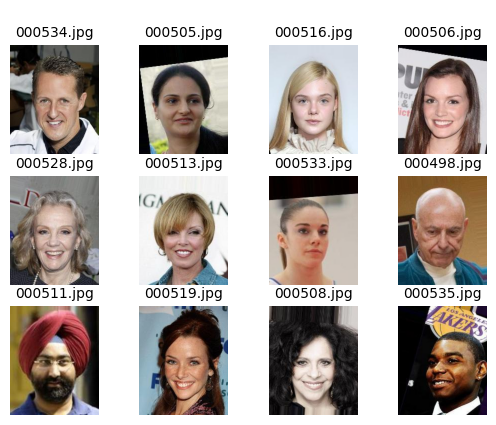

In [115]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(10,10)) # specifying the overall grid size
plt.subplots(3,4)


for i in range(1500,1512):
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,4,i+1 - 1500)
    plt.axis('off')
    plt.title('\n'+images[i].split('/')[-1],fontsize = 10)
    plt.imshow(img)
    print(pred_indx[i],' ',pred_captions[pred_indx[i]])

000521.jpg    the adult man has black hair, brown hair .
000524.jpg    the adult woman is wearing earring, earring and lipstick .
000525.jpg    the adult male has no beard .
000497.jpg    an attractive young woman with high cheekbones and thin eyebrows is smiling .
000502.jpg    the attractive young girl is smiling gently and looking at onward .
000532.jpg    an attractive young woman with small face and big eyes .
000515.jpg    a man with big lips is smiling .
000529.jpg    the young man has black messy hair and brown skin .
000518.jpg    an old man with big nose and thin lips .
000523.jpg    a young attractive lady with high cheekbones and wearing red dress .
000496.jpg    a young woman with curly long nose and long lips .
000527.jpg    the young lady has long sharp nose and round face drawn with eyeliner .


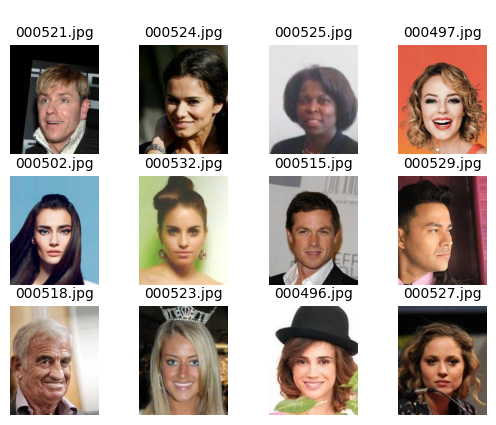

In [116]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(10,10)) # specifying the overall grid size
plt.subplots(3,4)


for i in range(1512,1524):
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,4,i+1 - 1512)
    plt.axis('off')
    plt.title('\n'+images[i].split('/')[-1],fontsize = 10)
    plt.imshow(img)
    print(pred_indx[i],' ',pred_captions[pred_indx[i]])

000499.jpg    a middle aged girl with sharp nose and long ear .
000509.jpg    the oldaged woman is wearing headband .
000500.jpg    the blond adult woman looking at onward, is smiling by teeth out .
000504.jpg    the attractive young lady is wearing lipstick and heavy makeup .
000530.jpg    a young woman with big lips and long nose .
000531.jpg    a young woman with curly black hair .
000522.jpg    an attractive young girl with oval face is smiling .
000517.jpg    the middle-aged man has blonde hair and big ear .
000512.jpg    a young man with big nose and short ear .
000514.jpg    the attractive young girl is wearing lipstick, makeup and lipstick .
000503.jpg    the attractive young lady is looking at onward .
000560.jpg    a man wearing a black sunglass .


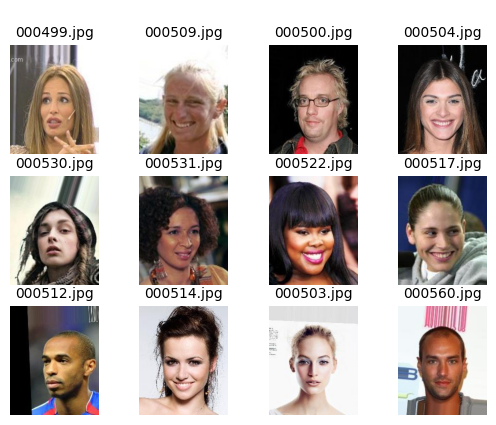

In [117]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(10,10)) # specifying the overall grid size
plt.subplots(3,4)


for i in range(1524,1536):
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,4,i+1 - 1524)
    plt.axis('off')
    plt.title('\n'+images[i].split('/')[-1],fontsize = 10)
    plt.imshow(img)
    print(pred_indx[i],' ',pred_captions[pred_indx[i]])

000554.jpg    the adult woman is wearing lipstick and earring .
000541.jpg    a young lady with black eyes and long nose .
000536.jpg    the face shape of attractive young woman is oval .
000539.jpg    the young woman has black hair and triangle face shape .
000561.jpg    a young man with small nose and thin lips .
000537.jpg    the adult male is smiling by teeth out .
000550.jpg    the young woman is looking at onward .
000547.jpg    the young lady has black hair and small ear .
000553.jpg    an attractive young woman is smiling with bringing teeth out .
000544.jpg    the attractive young woman is wearing lipstick and heavy makeup .
000549.jpg    the young lady is looking at onward .
000552.jpg    the attractive young man has no beard .


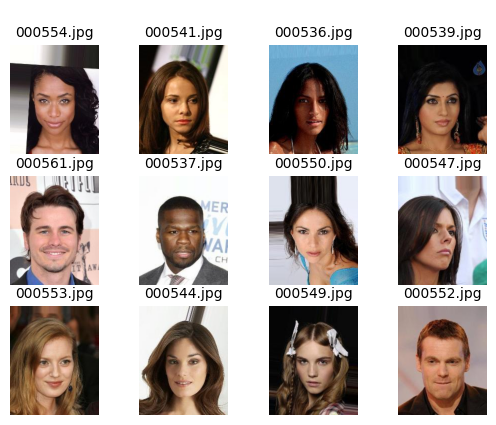

In [118]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(10,10)) # specifying the overall grid size
plt.subplots(3,4)


for i in range(1536,1548):
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,4,i+1 - 1536)
    plt.axis('off')
    plt.title('\n'+images[i].split('/')[-1],fontsize = 10)
    plt.imshow(img)
    print(pred_indx[i],' ',pred_captions[pred_indx[i]])